## Load Packages and Data

In [39]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data science
import pandas as pd
import numpy as np
from scipy import stats
import random
import math

# Machine Learning
from sklearn.preprocessing import MinMaxScaler

# ARIMA
#from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm

# Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

In [40]:
# Load data
AMZN = pd.read_csv('../dataset/AMZN.csv')
FB = pd.read_csv('../dataset/FB.csv')
PG = pd.read_csv('../dataset/PG.csv')
MSFT = pd.read_csv('../dataset/MSFT.csv')

## Exploratory Data Analysis and Feature Engineering

### Data Structure and Missing Value

In [41]:
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-11,907.039978,911.239990,897.500000,902.359985,902.359985,3012700
1,2017-04-12,903.090027,904.090027,895.250000,896.229980,896.229980,2456100
2,2017-04-13,891.450012,894.969971,884.489990,884.669983,884.669983,3174600
3,2017-04-17,887.500000,902.380005,887.500000,901.989990,901.989990,2854700
4,2017-04-18,900.989990,909.609985,900.780029,903.780029,903.780029,2999200


In [42]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [43]:
AMZN.describe(exclude="number")

,Date
count,1259
unique,1259
top,2020-07-23
freq,1


In [44]:
FB.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-11,140.800003,141.029999,138.809998,139.919998,139.919998,16638100
1,2017-04-12,139.720001,140.399994,139.440002,139.580002,139.580002,11612500
2,2017-04-13,139.619995,140.580002,139.330002,139.389999,139.389999,10965600
3,2017-04-17,139.759995,141.550003,139.750000,141.419998,141.419998,11519700
4,2017-04-18,141.270004,141.910004,140.610001,140.960007,140.960007,14807500


In [45]:
FB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [46]:
FB.describe(exclude="number")

,Date
count,1259
unique,1259
top,2020-07-23
freq,1


In [47]:
PG.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-11,89.660004,89.820000,89.290001,89.800003,78.077805,5186000
1,2017-04-12,89.699997,90.419998,89.559998,90.309998,78.521217,6286300
2,2017-04-13,90.050003,90.540001,89.790001,90.029999,78.277771,5040100
3,2017-04-17,90.230003,90.589996,90.129997,90.389999,78.590775,6931700
4,2017-04-18,90.400002,91.129997,90.339996,90.800003,78.947281,7087800


In [48]:
PG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [49]:
PG.describe(exclude="number")

,Date
count,1259
unique,1259
top,2020-07-23
freq,1


In [50]:
MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-11,65.599998,65.610001,64.849998,65.480003,61.124592,18791500
1,2017-04-12,65.419998,65.510002,65.110001,65.230003,60.891212,17108500
2,2017-04-13,65.290001,65.860001,64.949997,64.949997,60.629841,17896500
3,2017-04-17,65.040001,65.489998,65.010002,65.480003,61.124592,16689300
4,2017-04-18,65.330002,65.709999,65.160004,65.389999,61.040562,15155600


In [51]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [52]:
MSFT.describe(exclude="number")

,Date
count,1259
unique,1259
top,2020-07-23
freq,1


- The shapes of these four stocks are the same: 1259*7;

- No missing value is detected from the data

- The time ranges for these four stocks are the same: 2017-04-11 00:00:00 to 2022-04-08 00:00:00

### Time Series Plots

In [53]:
def get_ts_plot(df,column,name):
    df_temp = df.groupby(['Date'])[column].mean()
    df_temp.plot(title=f"Daily Closing Prices of {name}")

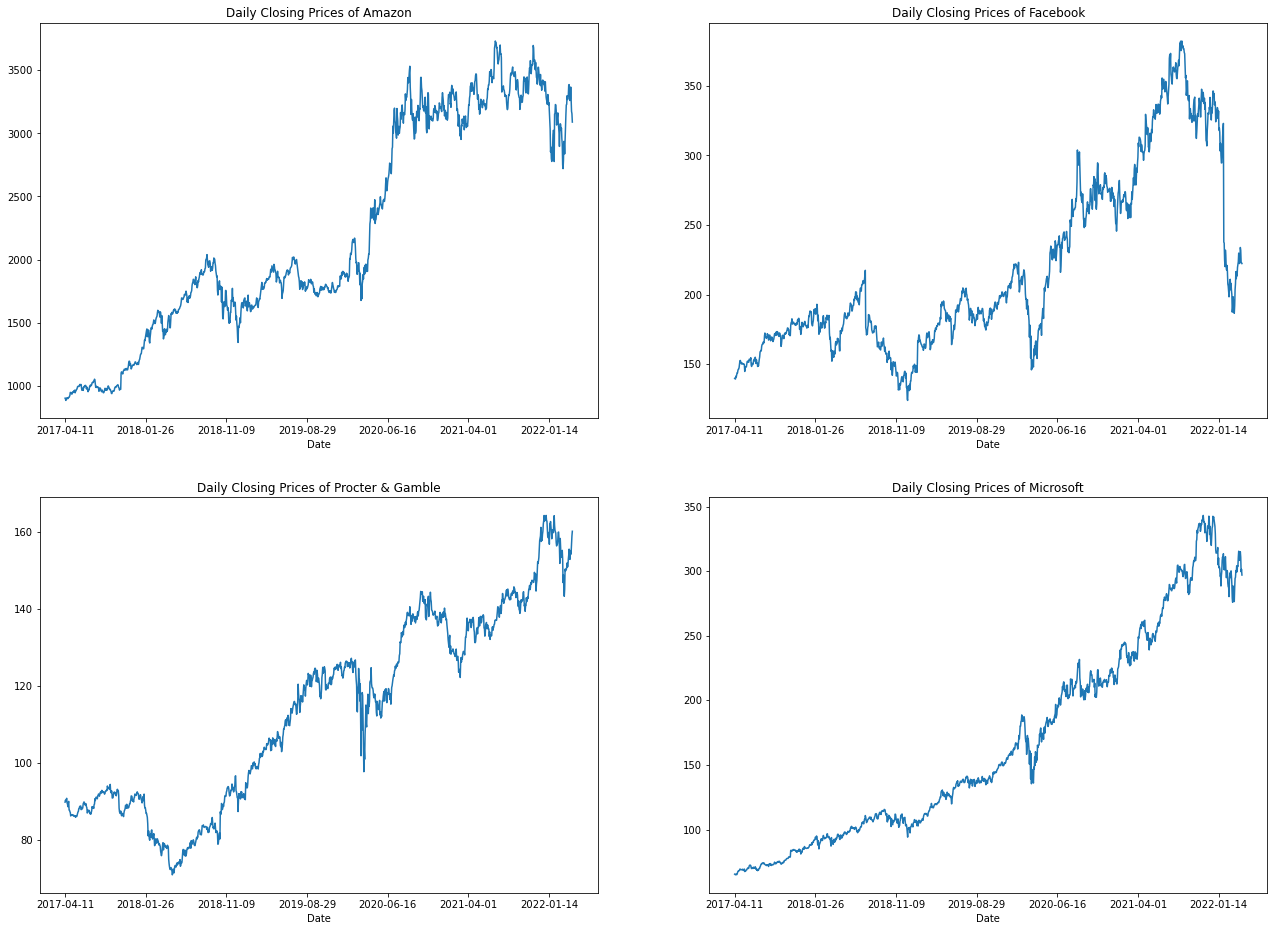

In [54]:
# Check the time series plots of all the stocks
plt.figure(figsize=(22,16))
plt.subplot(2,2,1)
get_ts_plot(AMZN,'Close','Amazon')
plt.subplot(2,2,2)
get_ts_plot(FB,'Close',"Facebook")
plt.subplot(2,2,3)
get_ts_plot(PG,'Close',"Procter & Gamble")
plt.subplot(2,2,4)
get_ts_plot(MSFT,'Close',"Microsoft")

### Data Pre-processing

In [55]:
def get_minmax(df, column):
    # Prepare data for normalization
    df_temp = df.filter([column])
    df_temp_value = df_temp.values

    # Train the normalization
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(df_temp_value)

    # Normalize the dataset and print the first 5 rows
    normalized = scaler.transform(df_temp_value)

    return normalized

In [56]:
# Normalize the features
AMZN_norm = AMZN
FB_norm = FB
PG_norm = PG
MSFT_norm = MSFT

for col in AMZN_norm.columns[1:]:
    AMZN_norm[col] = get_minmax(AMZN, col)
for col in FB_norm.columns[1:]:
    FB_norm[col] = get_minmax(FB, col)
for col in PG_norm.columns[1:]:
    PG_norm[col] = get_minmax(PG, col)
for col in MSFT_norm.columns[1:]:
    MSFT_norm[col] = get_minmax(MSFT, col)

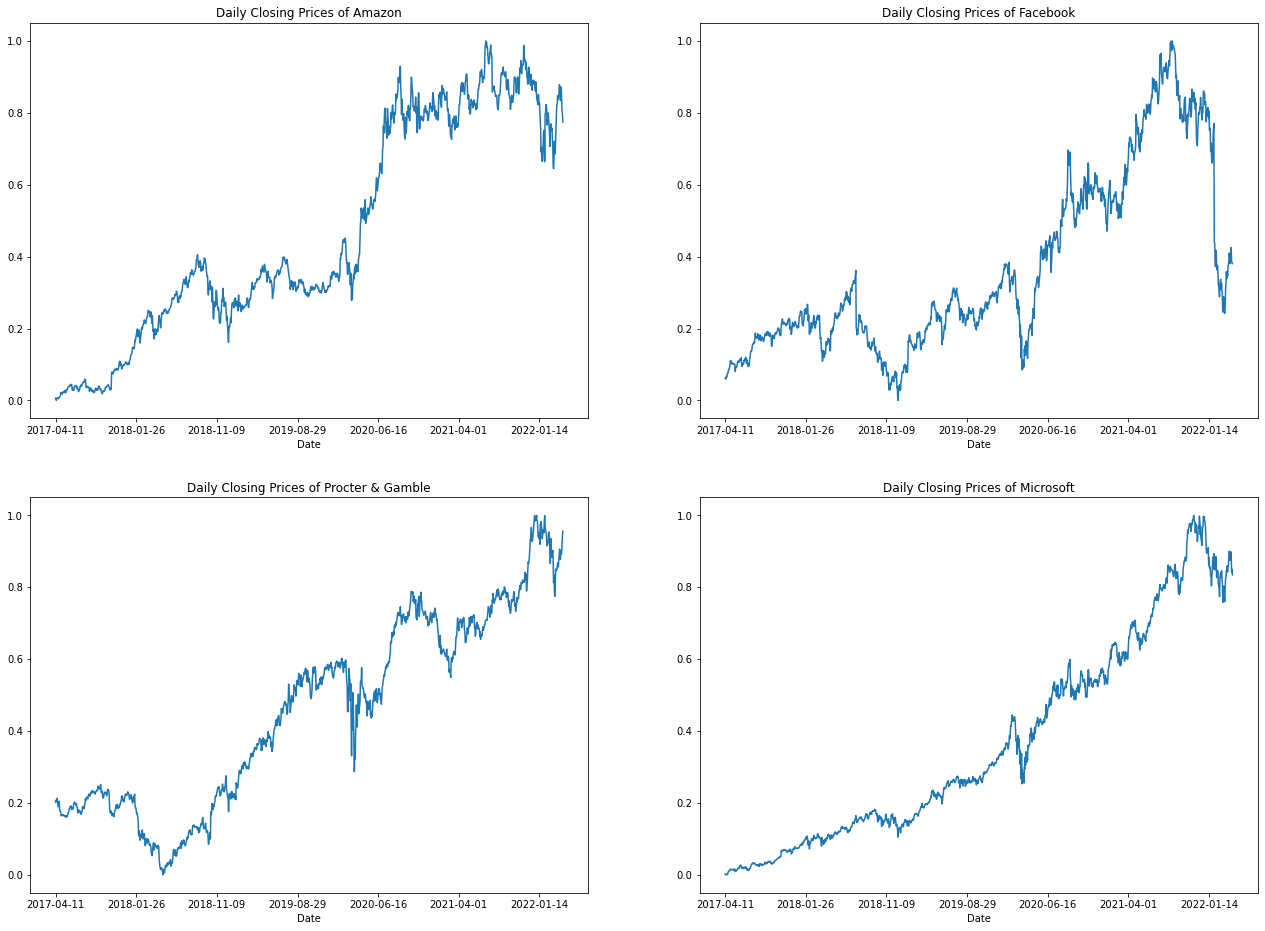

In [57]:
# Check the normalized time series plots of all the stocks
plt.figure(figsize=(22,16))
plt.subplot(2,2,1)
get_ts_plot(AMZN_norm,'Close','Amazon')
plt.subplot(2,2,2)
get_ts_plot(FB_norm,'Close',"Facebook")
plt.subplot(2,2,3)
get_ts_plot(PG_norm,'Close',"Procter & Gamble")
plt.subplot(2,2,4)
get_ts_plot(MSFT_norm,'Close',"Microsoft")

## Data Modeling

### Train Test Split

In [58]:
def get_train_test(df, prop):
    # Calculate the length of the training set
    train_length = int(len(df)*prop)

    # Create the training and testing sets
    train_data = df.loc[0:train_length-1, :]
    test_data = df.loc[train_length:,:]

    return train_data, test_data

In [59]:
def get_train_test_plot(df_train, df_test, column, name):
    df_train_temp = df_train.groupby(['Date'])[column].mean()
    df_test_temp = df_test.groupby(['Date'])[column].mean()
    ax = df_train_temp.plot(title=f"Daily Closing Prices of {name}")
    df_test_temp.plot(ax=ax)
    plt.legend(['Training set','Testing set'])

In [60]:
# Get the training and testing sets for all the stocks
prop = 0.8
AMZN_train, AMZN_test = get_train_test(AMZN_norm, prop)
FB_train, FB_test = get_train_test(FB_norm, prop)
PG_train, PG_test = get_train_test(PG_norm, prop)
MSFT_train, MSFT_test = get_train_test(MSFT_norm, prop)

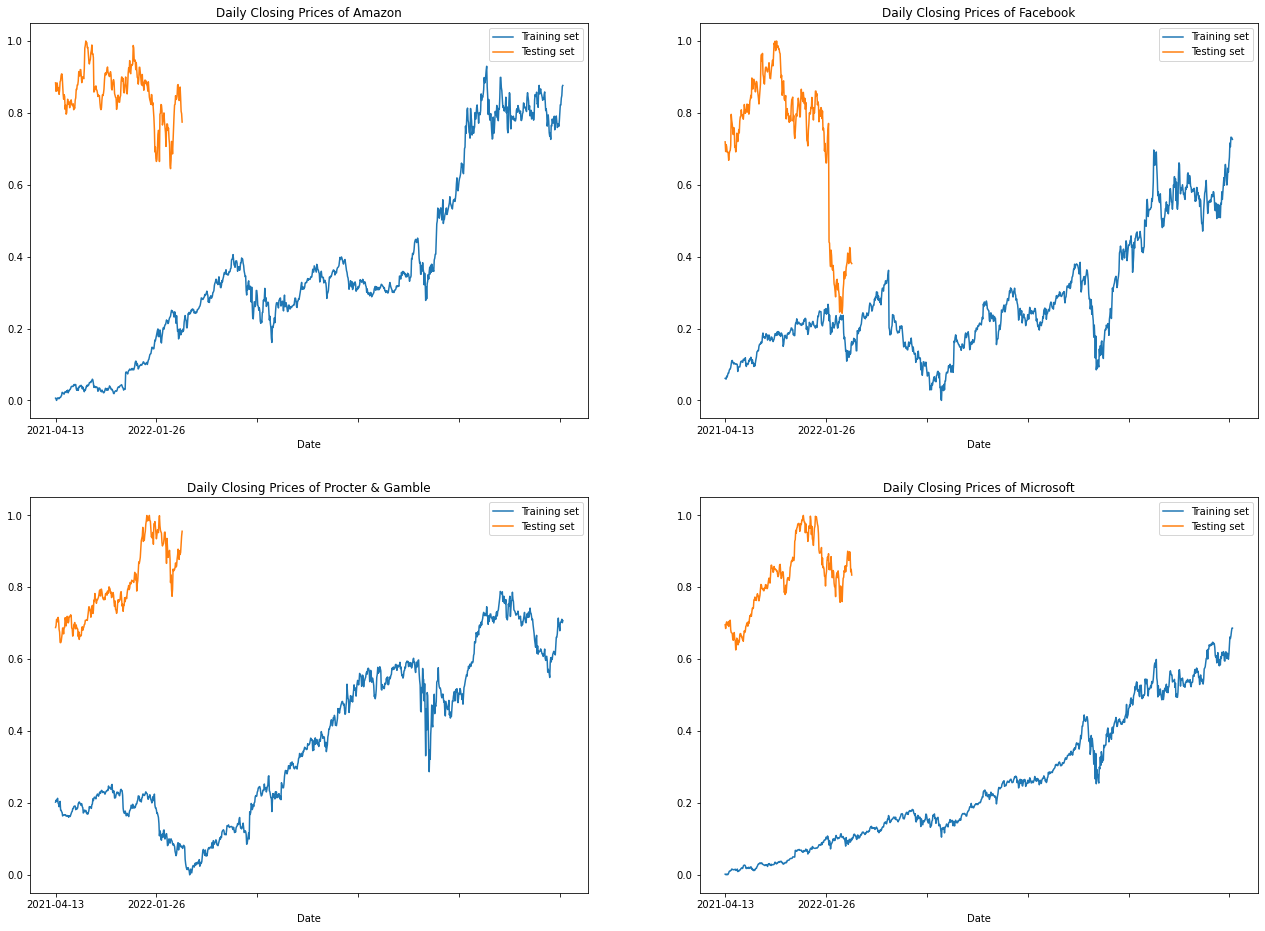

In [61]:
# Check the normalized time series plots of all the stocks after train test split
plt.figure(figsize=(22,16))
plt.subplot(2,2,1)
get_train_test_plot(AMZN_train, AMZN_test,"Close",'Amazon')
plt.subplot(2,2,2)
get_train_test_plot(FB_train, FB_test,"Close",'Facebook')
plt.subplot(2,2,3)
get_train_test_plot(PG_train, PG_test,"Close",'Procter & Gamble')
plt.subplot(2,2,4)
get_train_test_plot(MSFT_train, MSFT_test,"Close",'Microsoft')

### ARIMA Model

In [ ]:
def get_auto_arima(df,column):
    model = pm.auto_arima(df[column], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=False,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    return model.summary()

In [ ]:
# Check the best parameter for AMZN
get_auto_arima(AMZN_train,"Close")

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1007
Model:               SARIMAX(0, 1, 1)   Log Likelihood                2828.104
Date:                Fri, 06 May 2022   AIC                          -5650.207
Time:                        13:21:55   BIC                          -5635.466
Sample:                             0   HQIC                         -5644.606
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.000      1.996      0.046    1.53e-05       0.002
ma.L1         -0.0616      0.021     -2.921      0.003      -0.103      -0.020
sigma2         0.0002   5.41e-06     39.105      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               709.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.60   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Check the best parameter for FB
get_auto_arima(FB_train,"Close")

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1007
Model:               SARIMAX(1, 1, 1)   Log Likelihood                2666.944
Date:                Fri, 06 May 2022   AIC                          -5327.889
Time:                        13:21:59   BIC                          -5313.147
Sample:                             0   HQIC                         -5322.288
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6846      0.108     -6.329      0.000      -0.897      -0.473
ma.L1          0.6124      0.116      5.265      0.000       0.384       0.840
sigma2         0.0003   5.16e-06     56.508      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              5221.66
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.86   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Check the best parameter for PG
get_auto_arima(PG_train,"Close")

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1007
Model:               SARIMAX(1, 1, 0)   Log Likelihood                2753.852
Date:                Fri, 06 May 2022   AIC                          -5503.704
Time:                        13:22:01   BIC                          -5493.877
Sample:                             0   HQIC                         -5499.970
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1442      0.011    -13.261      0.000      -0.166      -0.123
sigma2         0.0002   4.03e-06     60.897      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6941.78
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.89   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Check the best parameter for MSFT
get_auto_arima(MSFT_train,"Close")

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1007
Model:               SARIMAX(1, 1, 0)   Log Likelihood                3218.607
Date:                Fri, 06 May 2022   AIC                          -6431.215
Time:                        13:22:02   BIC                          -6416.473
Sample:                             0   HQIC                         -6425.614
                               - 1007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.000      2.751      0.006       0.000       0.001
ar.L1         -0.2727      0.014    -19.614      0.000      -0.300      -0.245
sigma2      9.739e-05   2.08e-06     46.715      0.000    9.33e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2453.22
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              14.00   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
def get_arima_predict(train_df, test_df, column, order):
    train_df_value = train_df[column].values
    test_df_value = test_df[column].values
    history = [i for i in train_df_value]
    predict = []

    # Train and predict the data
    for i in range(len(test_df_value)):
        model = ARIMA(history,order = order)
        fitted = model.fit(disp = 0)
        output = fitted.forecast()
        predict.append(output[0][0])
        history.append(test_df_value[i])
    return predict

def get_arima_plot(df_train,df_test,df_predict,column,name):
    # Make as pandas series
    predict_series = pd.Series(df_predict, index=df_test['Date'])
    df_test_temp = df_test.groupby(['Date'])[column].mean()

    # Plot
    plt.plot(df_test_temp, label='true')
    plt.plot(predict_series, label='pre')

    plt.title(f'Forecast vs Actuals of {name}')
    plt.legend()

In [ ]:
AMZN_predict = get_arima_predict(AMZN_train, AMZN_test,"Close",(0, 1, 1))
FB_predict = get_arima_predict(FB_train, FB_test,"Close",(1, 1, 1))
PG_predict = get_arima_predict(PG_train, PG_test,"Close",(1, 1, 0))
MSFT_predict = get_arima_predict(MSFT_train, MSFT_test,"Close",(1, 1, 0))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: I

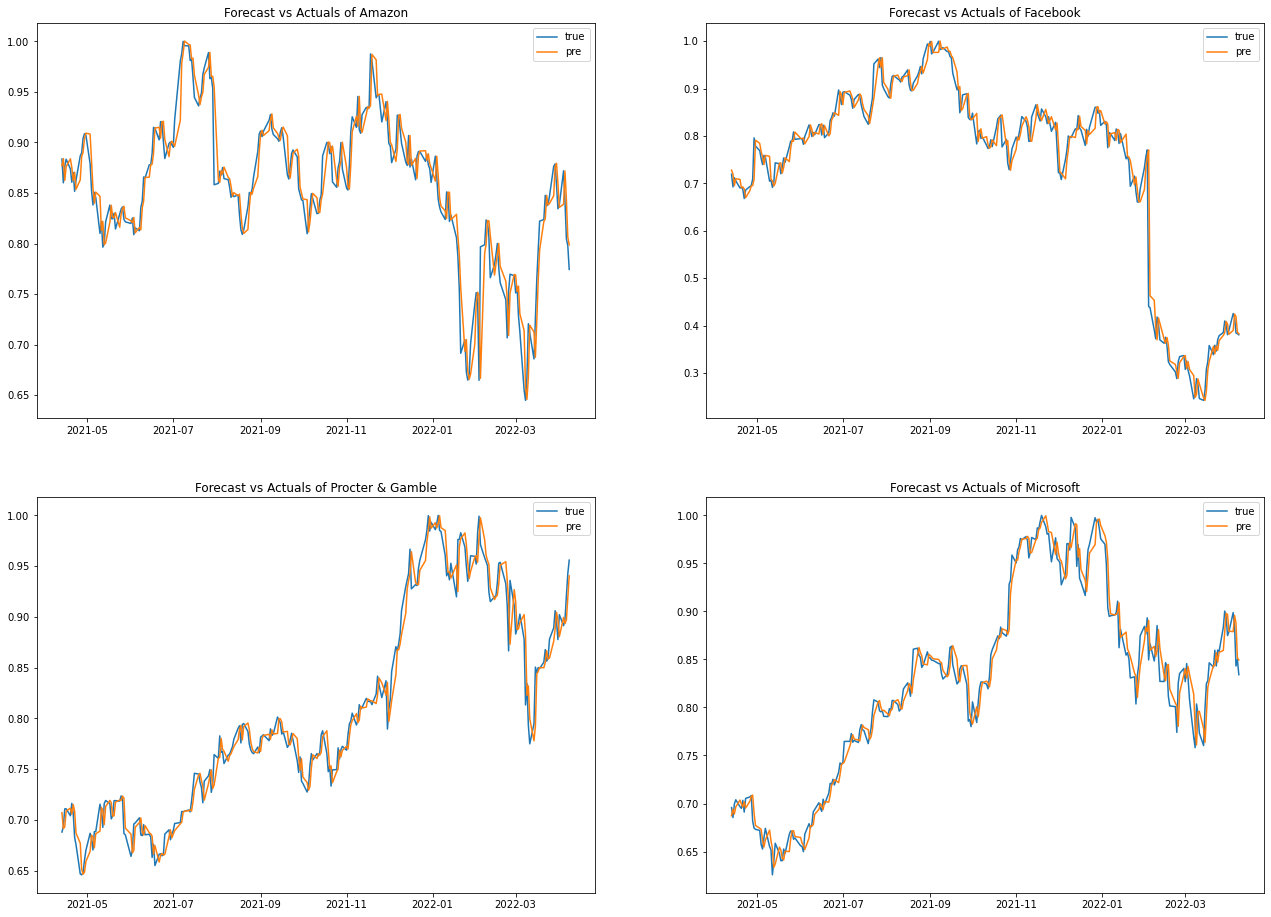

In [ ]:
# Check the normalized time series plots of all the stocks after train test split
plt.figure(figsize=(22,16))
plt.subplot(2,2,1)
get_arima_plot(AMZN_train, AMZN_test,AMZN_predict,"Close","Amazon")
plt.subplot(2,2,2)
get_arima_plot(FB_train, FB_test,FB_predict,"Close","Facebook")
plt.subplot(2,2,3)
get_arima_plot(PG_train, PG_test,PG_predict,"Close","Procter & Gamble")
plt.subplot(2,2,4)
get_arima_plot(MSFT_train, MSFT_test,MSFT_predict,"Close","Microsoft")

### LSTM

In [ ]:
#seq_len   # sequence length
#train_test_scale   # split ratio for training set
#batch_size   # rows of data to train in each batch
#input_size   # input dimension
#hidden_size   # hidden layer dimension
#num_layers   # number of neural network layers
#lr    # learning rate
#epochs   # number of training rounds 

def fun (data_norm, seq_len, train_test_scale, batch_size, input_size, hidden_size, num_layers, lr, epochs):
    data_norm_close = data_norm.loc[:, ['Close']]
    X = []
    Y = []
    for i in range(data_norm_close.shape[0] - seq_len):
        X.append(np.array(data_norm_close.iloc[i:i + seq_len,:].values, dtype=np.float32))
        Y.append(np.array(data_norm_close.iloc[i + seq_len,0], dtype=np.float32))
    
    x_train, x_test = X[:int(len(Y) * train_test_scale)], X[int(len(Y) * train_test_scale):]
    y_train, y_test = Y[:int(len(Y) * train_test_scale)], Y[int(len(Y) * train_test_scale):]

    # data loader
    class MyDataSet(Dataset):
        def __init__(self, X, Y):
            super().__init__()
            self.xx, self.yy = X, Y

        def __getitem__(self, index):
            return self.xx[index], self.yy[index]

        def __len__(self):
            return len(self.yy)


    trainDataSet = MyDataSet(x_train, y_train)
    testDataSet = MyDataSet(x_test, y_test)
    trainLoader = DataLoader(dataset=trainDataSet, batch_size=batch_size, shuffle=True)
    testLoader = DataLoader(dataset=testDataSet, batch_size=batch_size, shuffle=True)

    # define function model
    class LSTM(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers):
            super().__init__()
            self.input_size = input_size
            self.hidden_size = hidden_size
            self.num_layers = num_layers
            self.rnn = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers,
                            batch_first=True)
            self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=int(self.hidden_size / 2))
            self.act1 = nn.ReLU(inplace=True)
            self.out = nn.Linear(in_features= int(self.hidden_size / 2), out_features= 1)

        def forward(self, x):
            _, (hidden, cell) = self.rnn(x)
            out = self.fc1(hidden)
            out = self.act1(out)
            out = self.out(out)
            return out.reshape(-1, 1)
        

    model = LSTM(input_size, hidden_size, num_layers)

    # Adam optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # MSE loss function
    loss_function = nn.MSELoss()

    loss_array = []
    test_loss_array = []
    
    # start training
    for epoch in range(epochs):
        for i, (data_x, data_y) in enumerate(trainLoader):
            pred = model(data_x)
            pred = pred.reshape(-1)
            loss = loss_function(pred, data_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        for i, (data_x, data_y) in enumerate(testLoader):
            test_pred = model(data_x)
            test_pred = test_pred.reshape(-1)
            test_loss = loss_function(test_pred, data_y)
            optimizer.zero_grad()
            test_loss.backward()
            optimizer.step()
            
        if epoch % 10 == 0:
            loss_array.append(loss.item())
            test_loss_array.append(test_loss.item())
            print("start the {} rounds of training,loss value is {} ".format(epoch + 10, loss.item()))
    y_pred = []
    y_label = []
    with torch.no_grad():
        pred = model(torch.from_numpy(np.array(x_test)))
        y_pred.extend(pred.numpy())

    y_label = np.array(y_test).reshape(-1, 1)
    
    return y_label, y_pred, loss_array, test_loss_array

# get the plot, yellow is actual value, blue is predicted value
def LSTM_pred_plot(y_label,y_pred,name):
    plt.plot(y_label)
    plt.plot(y_pred)
    plt.title(f'Forecast vs Actuals of {name}')
    plt.legend(['pre', 'true'])

def LSTM_loss_plot(loss_array,test_loss_array,name):
    plt.plot(loss_array)
    plt.plot(test_loss_array)
    plt.xlabel('Epochs(X10)')
    plt.ylabel('MSE Loss')
    plt.title(f'Training and Testing Loss History of {name}')
    plt.legend(['Training Loss', 'Testing Loss'])

In [ ]:
# Seed
seed = 430
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

#AMZN  
AMZN_y_label, AMZN_y_pred, AMZN_loss_array, AMZN_test_loss_array = fun(AMZN_norm, 10, 0.8, 64, 1, 8, 1, 0.001, 2000)

#FB
FB_y_label, FB_y_pred, FB_loss_array, FB_test_loss_array = fun(FB_norm, 10, 0.8, 128, 1, 8, 1, 0.001, 2000)

#PG
PG_y_label, PG_y_pred, PG_loss_array, PG_test_loss_array = fun(PG_norm, 20, 0.8, 64, 1, 8, 1, 0.001, 2000)

#MSFT
MSFT_label, MSFT_y_pred, MSFT_loss_array, MSFT_test_loss_array = fun(MSFT_norm, 20, 0.8, 128, 1, 8, 1, 0.001, 2000)

start the 10 rounds of training,loss value is 0.07630430161952972 
start the 20 rounds of training,loss value is 0.004172474145889282 
start the 30 rounds of training,loss value is 0.0017684334889054298 
start the 40 rounds of training,loss value is 0.0008421322563663125 
start the 50 rounds of training,loss value is 0.0010408192174509168 
start the 60 rounds of training,loss value is 0.0004242353024892509 
start the 70 rounds of training,loss value is 0.0004462883516680449 
start the 80 rounds of training,loss value is 0.000655712210573256 
start the 90 rounds of training,loss value is 0.0005314529989846051 
start the 100 rounds of training,loss value is 0.0006339424871839583 
start the 110 rounds of training,loss value is 0.0005428451113402843 
start the 120 rounds of training,loss value is 0.0005493564531207085 
start the 130 rounds of training,loss value is 0.00031028519151732326 
start the 140 rounds of training,loss value is 0.0004211871128063649 
start the 150 rounds of training

start the 1180 rounds of training,loss value is 0.000281059299595654 
start the 1190 rounds of training,loss value is 0.00038889903225935996 
start the 1200 rounds of training,loss value is 0.00013888863031752408 
start the 1210 rounds of training,loss value is 6.640541687374935e-05 
start the 1220 rounds of training,loss value is 0.0001311804517172277 
start the 1230 rounds of training,loss value is 0.00016544903337489814 
start the 1240 rounds of training,loss value is 0.0001599827519385144 
start the 1250 rounds of training,loss value is 0.00023013775353319943 
start the 1260 rounds of training,loss value is 0.0002655002463143319 
start the 1270 rounds of training,loss value is 0.00019971335132140666 
start the 1280 rounds of training,loss value is 0.00026530647301115096 
start the 1290 rounds of training,loss value is 0.0001424486981704831 
start the 1300 rounds of training,loss value is 0.0001710869837552309 
start the 1310 rounds of training,loss value is 0.0001158444574684836 
s

start the 340 rounds of training,loss value is 0.0007210918702185154 
start the 350 rounds of training,loss value is 0.00039210589602589607 
start the 360 rounds of training,loss value is 0.00031592752202413976 
start the 370 rounds of training,loss value is 0.00045861536636948586 
start the 380 rounds of training,loss value is 0.00043026110506616533 
start the 390 rounds of training,loss value is 0.0006744158454239368 
start the 400 rounds of training,loss value is 0.0004073826421517879 
start the 410 rounds of training,loss value is 0.00037743960274383426 
start the 420 rounds of training,loss value is 0.00038989962195046246 
start the 430 rounds of training,loss value is 0.0002691176487132907 
start the 440 rounds of training,loss value is 0.0006681331433355808 
start the 450 rounds of training,loss value is 0.0005769371055066586 
start the 460 rounds of training,loss value is 0.0003325408906675875 
start the 470 rounds of training,loss value is 0.00044456610339693725 
start the 480

start the 1500 rounds of training,loss value is 0.0003533546987455338 
start the 1510 rounds of training,loss value is 0.00046112568816170096 
start the 1520 rounds of training,loss value is 0.0004445725935511291 
start the 1530 rounds of training,loss value is 0.00026249929214827716 
start the 1540 rounds of training,loss value is 0.0003231337177567184 
start the 1550 rounds of training,loss value is 0.0003725462593138218 
start the 1560 rounds of training,loss value is 0.0002790699654724449 
start the 1570 rounds of training,loss value is 0.00022367876954376698 
start the 1580 rounds of training,loss value is 0.00020121036504860967 
start the 1590 rounds of training,loss value is 0.00026618671836331487 
start the 1600 rounds of training,loss value is 0.0002912162453867495 
start the 1610 rounds of training,loss value is 0.0002686488442122936 
start the 1620 rounds of training,loss value is 0.0003448024217505008 
start the 1630 rounds of training,loss value is 0.0002365294931223616 
s

start the 660 rounds of training,loss value is 9.916593262460083e-05 
start the 670 rounds of training,loss value is 0.0003516365250106901 
start the 680 rounds of training,loss value is 0.00032273156102746725 
start the 690 rounds of training,loss value is 0.000219026580452919 
start the 700 rounds of training,loss value is 0.0006423767772503197 
start the 710 rounds of training,loss value is 0.0001780399470590055 
start the 720 rounds of training,loss value is 0.0003603505319915712 
start the 730 rounds of training,loss value is 0.0002874040510505438 
start the 740 rounds of training,loss value is 0.00014094513608142734 
start the 750 rounds of training,loss value is 0.0001501732476754114 
start the 760 rounds of training,loss value is 0.0002435163623886183 
start the 770 rounds of training,loss value is 0.0006108943489380181 
start the 780 rounds of training,loss value is 0.00039410003228113055 
start the 790 rounds of training,loss value is 0.0002540340938139707 
start the 800 roun

start the 1820 rounds of training,loss value is 0.00013849962851963937 
start the 1830 rounds of training,loss value is 0.0008283787756226957 
start the 1840 rounds of training,loss value is 0.0005510973278433084 
start the 1850 rounds of training,loss value is 0.0001853996072895825 
start the 1860 rounds of training,loss value is 0.0003067180223297328 
start the 1870 rounds of training,loss value is 9.4313953013625e-05 
start the 1880 rounds of training,loss value is 6.331287295324728e-05 
start the 1890 rounds of training,loss value is 0.00016926419630181044 
start the 1900 rounds of training,loss value is 0.00019897351739928126 
start the 1910 rounds of training,loss value is 0.00031592894811183214 
start the 1920 rounds of training,loss value is 0.00010727906919782981 
start the 1930 rounds of training,loss value is 7.098815694916993e-05 
start the 1940 rounds of training,loss value is 0.00019171541498508304 
start the 1950 rounds of training,loss value is 0.000296135462122038 
sta

start the 990 rounds of training,loss value is 7.00532182236202e-05 
start the 1000 rounds of training,loss value is 6.637694605160505e-05 
start the 1010 rounds of training,loss value is 0.0002657928562257439 
start the 1020 rounds of training,loss value is 7.780043961247429e-05 
start the 1030 rounds of training,loss value is 0.00011206963972654194 
start the 1040 rounds of training,loss value is 8.161475125234574e-05 
start the 1050 rounds of training,loss value is 0.00010853644198505208 
start the 1060 rounds of training,loss value is 0.00016573583707213402 
start the 1070 rounds of training,loss value is 9.788107854546979e-05 
start the 1080 rounds of training,loss value is 0.00015361826808657497 
start the 1090 rounds of training,loss value is 5.798221172881313e-05 
start the 1100 rounds of training,loss value is 7.726110197836533e-05 
start the 1110 rounds of training,loss value is 8.209801308112219e-05 
start the 1120 rounds of training,loss value is 0.00023269990924745798 
sta

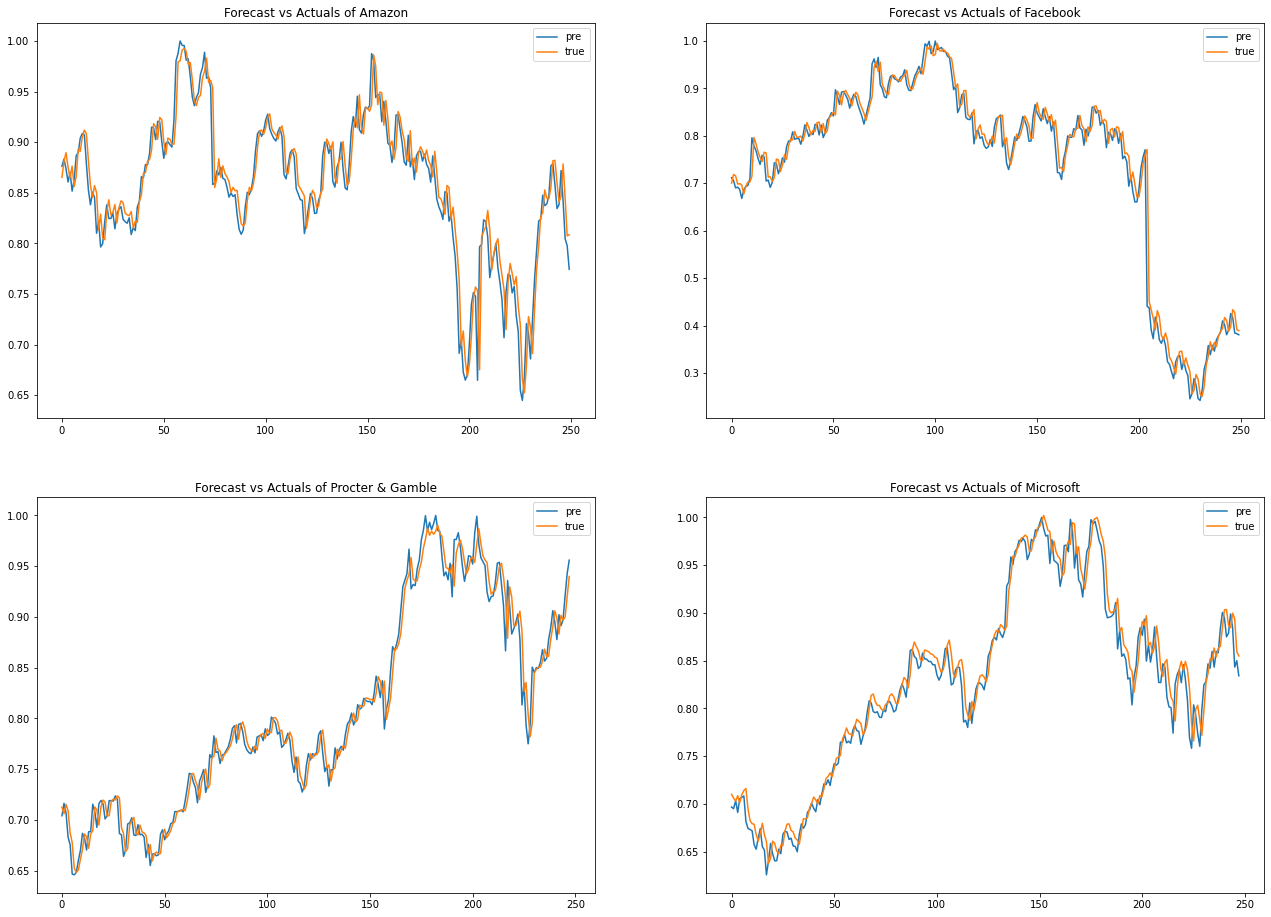

In [ ]:
# Check the normalized time series plots of all the stocks after train test split
plt.figure(figsize=(22,16))
plt.subplot(2,2,1)
LSTM_pred_plot(AMZN_y_label,AMZN_y_pred, "Amazon")
plt.subplot(2,2,2)
LSTM_pred_plot(FB_y_label,FB_y_pred, "Facebook")
plt.subplot(2,2,3)
LSTM_pred_plot(PG_y_label,PG_y_pred, "Procter & Gamble")
plt.subplot(2,2,4)
LSTM_pred_plot(MSFT_label,MSFT_y_pred,  "Microsoft")

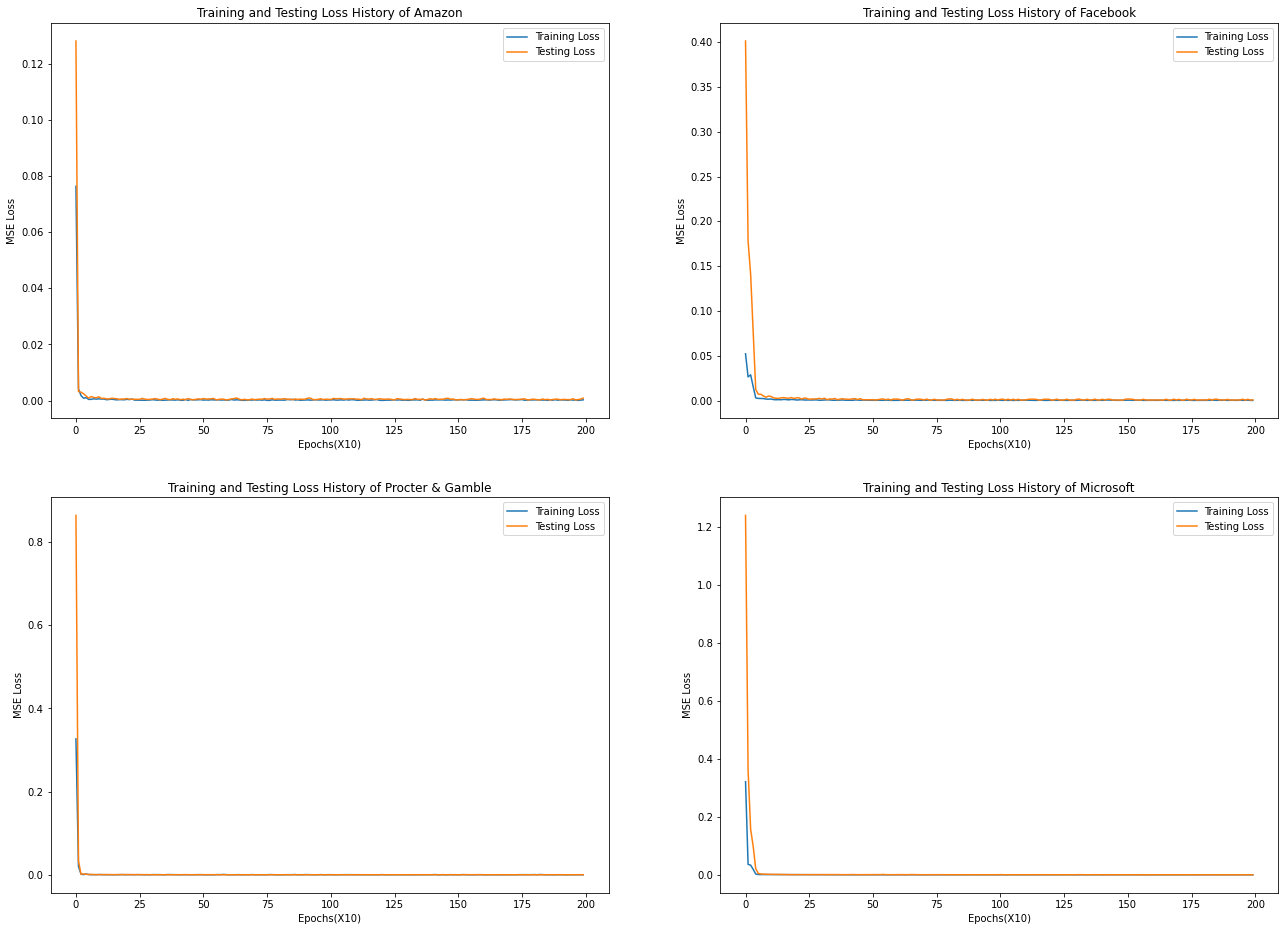

In [ ]:
# Check the normalized time series plots of all the stocks after train test split
plt.figure(figsize=(22,16))
plt.subplot(2,2,1)
LSTM_loss_plot(AMZN_loss_array, AMZN_test_loss_array, "Amazon")
plt.subplot(2,2,2)
LSTM_loss_plot(FB_loss_array, FB_test_loss_array, "Facebook")
plt.subplot(2,2,3)
LSTM_loss_plot(PG_loss_array, PG_test_loss_array, "Procter & Gamble")
plt.subplot(2,2,4)
LSTM_loss_plot(MSFT_loss_array, MSFT_test_loss_array,  "Microsoft")

### CNN

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [28]:
class ConvNet(nn.Module):
    def __init__(self, lrate, loss_fn, in_size, in_channel):
        """
        Initializes the layers of your neural network.

        @param lrate: learning rate for the model
        @param loss_fn: A loss function
        @param in_size: input size
        @param in_channel: input channel
        """
        super(ConvNet, self).__init__()
        self.loss_fn = loss_fn
        self.model = nn.Sequential(
                nn.Conv1d(in_channels=in_channel, out_channels=128, kernel_size=8, padding='same'),
                nn.ReLU(),
                nn.Conv1d(in_channels=128,out_channels=256, kernel_size=5, padding='same'),
                nn.ReLU(),
                nn.Conv1d(in_channels=256,out_channels=64, kernel_size=3, padding='same'),
                nn.ReLU(),
                nn.AvgPool1d(kernel_size=in_size),
                nn.Flatten(),
                nn.Linear(int(np.floor((in_size)/20)*64), 1),
        )
        self.model.to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lrate)

    def forward(self, x):
        """Performs a forward pass through your neural net (evaluates f(x)).

        @param x: an (N, in_channel, in_size) Tensor
        @return y: an (N, 1) Tensor of output from the network
        """
        y = self.model(x)
        return y

    def step(self, x, y):
        """
        Performs one gradient step through a batch of data x with labels y.

        @param x: an (N, in_size) Tensor
        @param y: an (N,) Tensor
        @return L: total empirical risk (mean of losses) at this timestep as a float
        """
        self.optimizer.zero_grad()
        y_pred = self.forward(x)
        y = y.reshape(-1,1)
        loss = self.loss_fn(y_pred, y)
        loss.backward()
        self.optimizer.step()
        return loss.item()

In [29]:
def fit(train_set, train_labels, eval_set, eval_label,n_epoch, lr=0.001, Conv2d = False, batch_size=100, EarlyStop = False):
    """ Fit a neural net. Use the full batch size.

    @param train_set: an (N, in_channel, out_size) Tensor
    @param train_labels: an (N,) Tensor
    @param n_epoch: an int, the number of epoches of training
    @param lr: a float, learning rate, default 0.01
    @param Conv2d: bool type, if True, the convolution layer will be set to 2d
    @param batch_size: size of each batch to train on. (default 100)
    @oaram EarlyStop: bool type, if True, the training will stop when the training loss stop to decrease

    @return losses: array of total loss at the beginning and after each iteration.
            Ensure that len(losses) == n_iter.
    @return net: a ConvNet object
    """
 
    N, in_channel, in_size = train_set.shape
    Net = ConvNet(lr, nn.MSELoss(), in_size, in_channel)
    losses = []
    eval_losses = []
    y_split = torch.split(train_labels, batch_size)
    for k in range(n_epoch):
        loss = 0
        for i, batch in enumerate(torch.split(train_set, batch_size)):
            loss +=  Net.step(batch, y_split[i])
        losses.append(loss/(i+1))
        eval_loss = torch.mean(((Net(eval_set).reshape(-1)) - eval_label)**2)
        eval_losses.append(eval_loss.item())
        print('Epoch %d/%d Loss: %f || Eval_loss: %f'%(k+1, n_epoch, losses[k], eval_loss))
        if EarlyStop:
            if k >= 10:
                if losses[-10] == min(losses[-10:]):
                    return losses, eval_losses, Net
    return losses,eval_losses, Net

In [30]:
def Tensorize(timeWindow, data, shuffle = True):
    Data = np.array([data[i:i+timeWindow] for i in range(len(data) - timeWindow)])
    if len(Data.shape) == 2:
        Data = Data[:, :,np.newaxis]
    Data = np.swapaxes(Data, 1,2)
    Label = np.array(data[timeWindow:])
    if len(Label.shape)> 1:
        Label = Label[:, 3]
    if shuffle:
        shuffle_index = torch.randperm(Data.shape[0])
    else:
        shuffle_index = torch.arange(Data.shape[0])
    Data = torch.from_numpy(Data[shuffle_index]).to(torch.float32)
    Label = torch.from_numpy(Label[shuffle_index]).to(torch.float32)
    return Data, Label
    

In [31]:
def CNN_Pred_plot(testset, testlabel, Net, name):
    pred = Net(testset)
    plt.plot(pred.cpu().detach())
    plt.plot(testlabel.cpu().detach())
    plt.title(f'Forecast vs Actuals of {name}')
    plt.legend(['pre', 'true'])

In [32]:
def CNN_loss_plot(lossHistory, evalHistory,name):
    plt.plot(lossHistory)
    plt.plot(evalHistory)
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.title(f'Training and Testing Loss History of {name}')
    plt.legend(['Training Loss', 'Testing Loss'])

In [33]:
l = 20

# Seed
seed = 430
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# AMAZON
AMZN_all = list(AMZN_train.loc[:, 'Open':'Volume'].values)
AMZN_all_test = list(AMZN_test.loc[:, 'Open':'Volume'].values)
TrainSet_AZall, TrainLabel_AZall = Tensorize(l, AMZN_all)
TestSet_AZall, TestLabel_AZall = Tensorize(l, AMZN_all_test, shuffle=False)
TrainSet_AZall = TrainSet_AZall.to(device)
TrainLabel_AZall = TrainLabel_AZall.to(device)
TestSet_AZall = TestSet_AZall.to(device)
TestLabel_AZall = TestLabel_AZall.to(device)

# FaceBook
FB_all = list(FB_train.loc[:, 'Open':'Volume'].values)
FB_all_test = list(FB_test.loc[:, 'Open':'Volume'].values)
TrainSet_FBall, TrainLabel_FBall = Tensorize(l, FB_all)
TestSet_FBall, TestLabel_FBall = Tensorize(l, FB_all_test, shuffle=False)
TrainSet_FBall = TrainSet_FBall.to(device)
TrainLabel_FBall = TrainLabel_FBall.to(device)
TestSet_FBall = TestSet_FBall.to(device)
TestLabel_FBall = TestLabel_FBall.to(device)

# PG
PG_all = list(PG_train.loc[:, 'Open':'Volume'].values)
PG_all_test = list(PG_test.loc[:, 'Open':'Volume'].values)
TrainSet_PGall, TrainLabel_PGall = Tensorize(l, PG_all)
TestSet_PGall, TestLabel_PGall = Tensorize(l, PG_all_test, shuffle=False)
TrainSet_PGall = TrainSet_PGall.to(device)
TrainLabel_PGall = TrainLabel_PGall.to(device)
TestSet_PGall = TestSet_PGall.to(device)
TestLabel_PGall = TestLabel_PGall.to(device)

# MSFT
MS_all = list(MSFT_train.loc[:, 'Open':'Volume'].values)
MS_all_test = list(MSFT_test.loc[:, 'Open':'Volume'].values)
TrainSet_MSall, TrainLabel_MSall = Tensorize(l, MS_all)
TestSet_MSall, TestLabel_MSall = Tensorize(l, MS_all_test, shuffle=False)
TrainSet_MSall = TrainSet_MSall.to(device)
TrainLabel_MSall = TrainLabel_MSall.to(device)
TestSet_MSall = TestSet_MSall.to(device)
TestLabel_MSall = TestLabel_MSall.to(device)

# Train the model
AZlossHistory, AZevalHistory, AZCNN = fit(TrainSet_AZall, TrainLabel_AZall, TestSet_AZall, TestLabel_AZall,n_epoch=10, lr=0.0005, batch_size = 1, EarlyStop=True)
FBlossHistory, FBevalHistory, FBCNN = fit(TrainSet_FBall, TrainLabel_FBall, TestSet_FBall, TestLabel_FBall,n_epoch=10, lr=0.0005, batch_size = 1, EarlyStop=True)
PGlossHistory, PGevalHistory, PGCNN = fit(TrainSet_PGall, TrainLabel_PGall, TestSet_PGall, TestLabel_PGall,n_epoch=10, lr=0.0005, batch_size = 1, EarlyStop=True)
MSlossHistory, MSevalHistory, MSCNN = fit(TrainSet_MSall, TrainLabel_MSall, TestSet_MSall, TestLabel_MSall,n_epoch=10, lr=0.0005, batch_size = 1, EarlyStop=True)

Epoch 1/10 Loss: 0.004731 || Eval_loss: 0.003101
Epoch 2/10 Loss: 0.002782 || Eval_loss: 0.002554
Epoch 3/10 Loss: 0.002136 || Eval_loss: 0.002321
Epoch 4/10 Loss: 0.001686 || Eval_loss: 0.002041
Epoch 5/10 Loss: 0.001379 || Eval_loss: 0.001765
Epoch 6/10 Loss: 0.001116 || Eval_loss: 0.001901
Epoch 7/10 Loss: 0.001018 || Eval_loss: 0.001376
Epoch 8/10 Loss: 0.000868 || Eval_loss: 0.001248
Epoch 9/10 Loss: 0.000744 || Eval_loss: 0.001087
Epoch 10/10 Loss: 0.000650 || Eval_loss: 0.000955
Epoch 1/10 Loss: 0.003491 || Eval_loss: 0.026254
Epoch 2/10 Loss: 0.001719 || Eval_loss: 0.008036
Epoch 3/10 Loss: 0.001063 || Eval_loss: 0.003901
Epoch 4/10 Loss: 0.000790 || Eval_loss: 0.002268
Epoch 5/10 Loss: 0.000672 || Eval_loss: 0.001559
Epoch 6/10 Loss: 0.000601 || Eval_loss: 0.001361
Epoch 7/10 Loss: 0.000563 || Eval_loss: 0.001309
Epoch 8/10 Loss: 0.000522 || Eval_loss: 0.001223
Epoch 9/10 Loss: 0.000491 || Eval_loss: 0.001222
Epoch 10/10 Loss: 0.000474 || Eval_loss: 0.001206
Epoch 1/10 Loss: 0

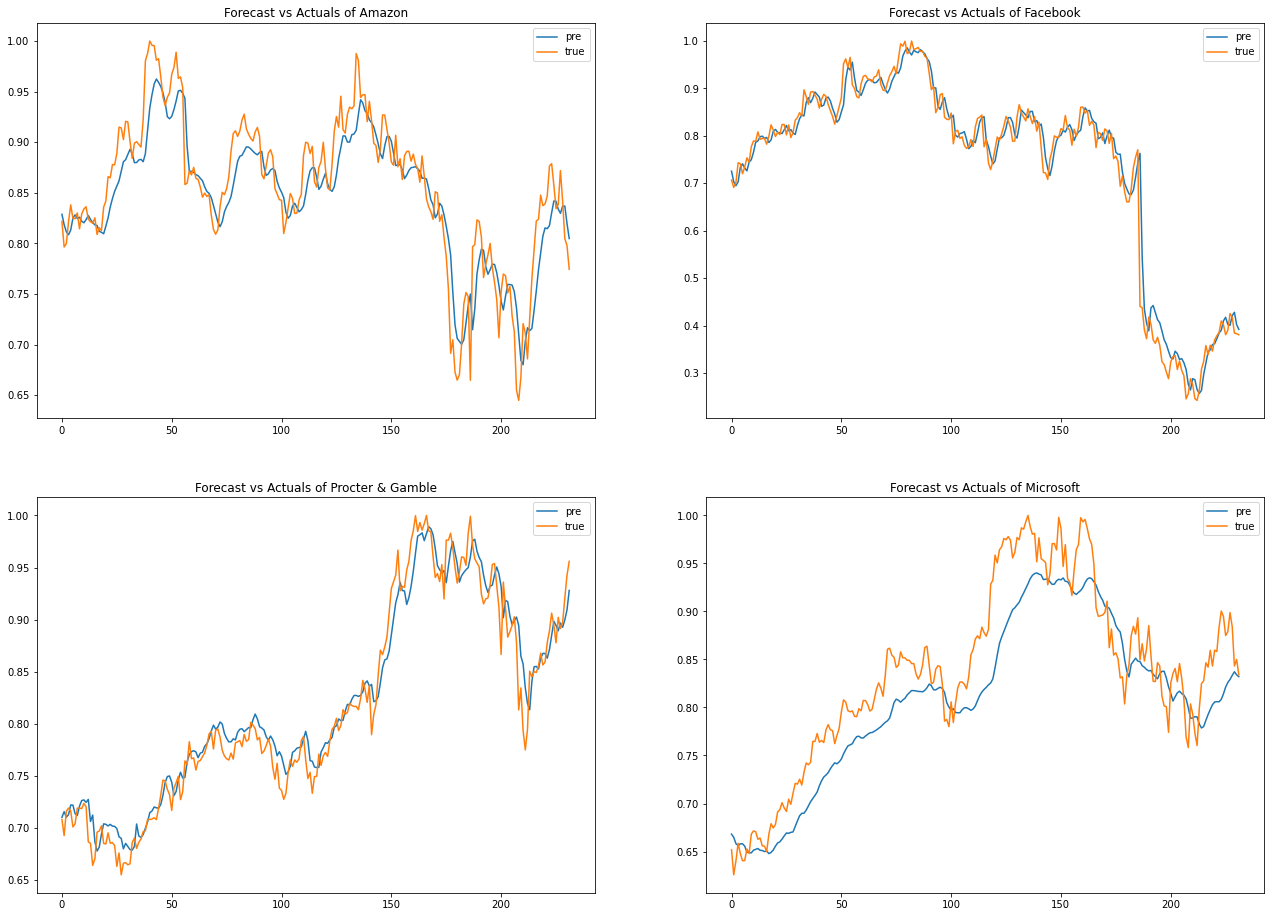

In [34]:
# Check the normalized time series plots of all the stocks after train test split
plt.figure(figsize=(22,16))
plt.subplot(2,2,1)
CNN_Pred_plot(TestSet_AZall, TestLabel_AZall, AZCNN, "Amazon")
plt.subplot(2,2,2)
CNN_Pred_plot(TestSet_FBall, TestLabel_FBall, FBCNN, "Facebook")
plt.subplot(2,2,3)
CNN_Pred_plot(TestSet_PGall, TestLabel_PGall, PGCNN, "Procter & Gamble")
plt.subplot(2,2,4)
CNN_Pred_plot(TestSet_MSall, TestLabel_MSall, MSCNN, "Microsoft")

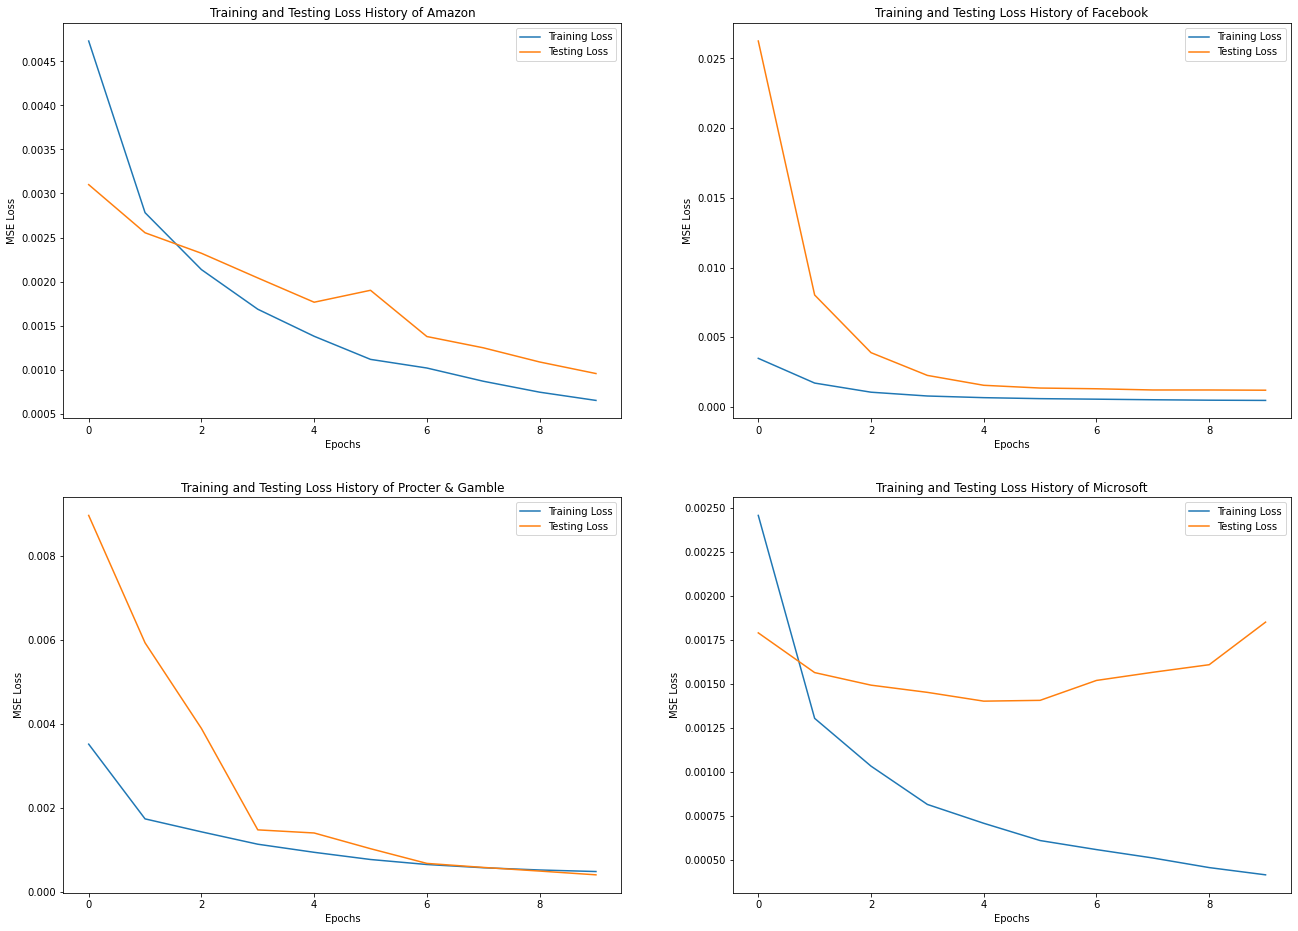

In [35]:
# Check the normalized time series plots of all the stocks after train test split
plt.figure(figsize=(22,16))
plt.subplot(2,2,1)
CNN_loss_plot(AZlossHistory, AZevalHistory, "Amazon")
plt.subplot(2,2,2)
CNN_loss_plot(FBlossHistory, FBevalHistory, "Facebook")
plt.subplot(2,2,3)
CNN_loss_plot(PGlossHistory, PGevalHistory, "Procter & Gamble")
plt.subplot(2,2,4)
CNN_loss_plot(MSlossHistory, MSevalHistory, "Microsoft")

## Model Evaluation

In [ ]:
def ARIMA_rmse(df_predict, df_test, column,name):

    # Calculate RMSE
    rmse = np.mean((df_predict - df_test[column])**2)**.5
    
    print(f'RMSE of {name} stock prediction is {rmse} \n')

In [ ]:
# ARIMA
# Calculate the RMSE for all the stock predictions
ARIMA_rmse(AMZN_predict, AMZN_test,"Close",'Amazon')
ARIMA_rmse(FB_predict, FB_test,"Close",'Facebook')
ARIMA_rmse(PG_predict, PG_test,"Close",'Procter & Gamble')
ARIMA_rmse(MSFT_predict, MSFT_test,"Close",'Microsoft')

RMSE of Amazon stock prediction is 0.022235505648307195 

RMSE of Facebook stock prediction is 0.03172219405624033 

RMSE of Procter & Gamble stock prediction is 0.016160410063499928 

RMSE of Microsoft stock prediction is 0.016244859759269287 



In [ ]:
def LSTM_rmse(y_pred,y_label,name):
    sum = 0
    for i in range(len(y_pred)):
        sum += pow(y_label[i] - y_pred[i], 2)
    rmse = math.sqrt(sum / len(y_pred))
    print(f'RMSE of {name} stock prediction is {rmse} \n')

In [ ]:
# LSTM
# Calculate the RMSE for all the stock predictions
LSTM_rmse(AMZN_y_pred,AMZN_y_label,'Amazon')
LSTM_rmse(FB_y_pred,FB_y_label,'Facebook')
LSTM_rmse(PG_y_pred,PG_y_label,'Procter & Gamble')
LSTM_rmse(MSFT_y_pred,MSFT_label,'Microsoft')

RMSE of Amazon stock prediction is 0.022320921260952618 

RMSE of Facebook stock prediction is 0.031893462664263725 

RMSE of Procter & Gamble stock prediction is 0.016091680859562953 

RMSE of Microsoft stock prediction is 0.017464314853914177 



In [36]:
def CNN_rmse(testset, testlabel, Net,name):
    pred = Net(testset)
    rmse = np.sqrt((torch.mean((pred.reshape(-1) - testlabel)**2)).item())
    print(f'RMSE of {name} stock prediction is {rmse} \n')

In [37]:
# CNN
# Calculate the RMSE for all the stock predictions
CNN_rmse(TestSet_AZall, TestLabel_AZall, AZCNN,'Amazon')
CNN_rmse(TestSet_FBall, TestLabel_FBall, FBCNN,'Facebook')
CNN_rmse(TestSet_PGall, TestLabel_PGall, PGCNN,'Procter & Gamble')
CNN_rmse(TestSet_MSall, TestLabel_MSall, MSCNN,'Microsoft')

RMSE of Amazon stock prediction is 0.03090885524754843 

RMSE of Facebook stock prediction is 0.03473019220769593 

RMSE of Procter & Gamble stock prediction is 0.020256059722030973 

RMSE of Microsoft stock prediction is 0.04301293225698937 



## GradioApp Demo

In [72]:
import gradio as gr

ImportError: cannot import name 'ParamSpec' from 'typing_extensions' (d:\Anaconda\lib\site-packages\typing_extensions.py)

In [ ]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data science
import pandas as pd
import numpy as np
from scipy import stats
import random
import math

# Machine Learning
from sklearn.preprocessing import MinMaxScaler

# ARIMA
from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm

# Deep Learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

# Demo
import gradio as gr


def cnn_demo(df,prop=0.8,l = 20, seed=430, name="Amazon"):
    def get_minmax(df, column):
        # Prepare data for normalization
        df_temp = df.filter([column])
        df_temp_value = df_temp.values

        # Train the normalization
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler = scaler.fit(df_temp_value)

        # Normalize the dataset and print the first 5 rows
        normalized = scaler.transform(df_temp_value)

        return normalized
    def get_train_test(df, prop):
        # Calculate the length of the training set
        train_length = int(len(df)*prop)

        # Create the training and testing sets
        train_data = df.loc[0:train_length-1, :]
        test_data = df.loc[train_length:,:]

        return train_data, test_data
    def get_train_test_plot(df_train, df_test, column, name):
        df_train_temp = df_train.groupby(['Date'])[column].mean()
        df_test_temp = df_test.groupby(['Date'])[column].mean()
        ax = df_train_temp.plot(title=f"Daily Closing Prices of {name}")
        df_test_temp.plot(ax=ax)
        plt.legend(['Training set','Testing set'])
    class ConvNet(nn.Module):
        def __init__(self, lrate, loss_fn, in_size, in_channel):
            """
            Initializes the layers of your neural network.

            @param lrate: learning rate for the model
            @param loss_fn: A loss function
            @param in_size: input size
            @param in_channel: input channel
            """
            super(ConvNet, self).__init__()
            self.loss_fn = loss_fn
            self.model = nn.Sequential(
                    nn.Conv1d(in_channels=in_channel, out_channels=128, kernel_size=8, padding='same'),
                    nn.ReLU(),
                    nn.Conv1d(in_channels=128,out_channels=256, kernel_size=5, padding='same'),
                    nn.ReLU(),
                    nn.Conv1d(in_channels=256,out_channels=64, kernel_size=3, padding='same'),
                    nn.ReLU(),
                    nn.AvgPool1d(kernel_size=in_size),
                    nn.Flatten(),
                    nn.Linear(int(np.floor((in_size)/20)*64), 1),
            )
            self.model.to(device)
            self.optimizer = optim.Adam(self.model.parameters(), lr=lrate)

        def forward(self, x):
            """Performs a forward pass through your neural net (evaluates f(x)).

            @param x: an (N, in_channel, in_size) Tensor
            @return y: an (N, 1) Tensor of output from the network
            """
            y = self.model(x)
            return y

        def step(self, x, y):
            """
            Performs one gradient step through a batch of data x with labels y.

            @param x: an (N, in_size) Tensor
            @param y: an (N,) Tensor
            @return L: total empirical risk (mean of losses) at this timestep as a float
            """
            self.optimizer.zero_grad()
            y_pred = self.forward(x)
            y = y.reshape(-1,1)
            loss = self.loss_fn(y_pred, y)
            loss.backward()
            self.optimizer.step()
            return loss.item()
    def fit(train_set, train_labels, eval_set, eval_label,n_epoch, lr=0.001, Conv2d = False, batch_size=100, EarlyStop = False):
        """ Fit a neural net. Use the full batch size.

        @param train_set: an (N, in_channel, out_size) Tensor
        @param train_labels: an (N,) Tensor
        @param n_epoch: an int, the number of epoches of training
        @param lr: a float, learning rate, default 0.01
        @param Conv2d: bool type, if True, the convolution layer will be set to 2d
        @param batch_size: size of each batch to train on. (default 100)
        @oaram EarlyStop: bool type, if True, the training will stop when the training loss stop to decrease

        @return losses: array of total loss at the beginning and after each iteration.
                Ensure that len(losses) == n_iter.
        @return net: a ConvNet object
        """

        N, in_channel, in_size = train_set.shape
        Net = ConvNet(lr, nn.MSELoss(), in_size, in_channel)
        losses = []
        eval_losses = []
        y_split = torch.split(train_labels, batch_size)
        for k in range(n_epoch):
            loss = 0
            for i, batch in enumerate(torch.split(train_set, batch_size)):
                loss +=  Net.step(batch, y_split[i])
            losses.append(loss/(i+1))
            eval_loss = torch.mean(((Net(eval_set).reshape(-1)) - eval_label)**2)
            eval_losses.append(eval_loss.item())
            if EarlyStop:
                if k >= 10:
                    if losses[-10] == min(losses[-10:]):
                        return losses, eval_losses, Net
        return losses,eval_losses, Net
    def Tensorize(timeWindow, data, shuffle = True):
        Data = np.array([data[i:i+timeWindow] for i in range(len(data) - timeWindow)])
        if len(Data.shape) == 2:
            Data = Data[:, :,np.newaxis]
        Data = np.swapaxes(Data, 1,2)
        Label = np.array(data[timeWindow:])
        if len(Label.shape)> 1:
            Label = Label[:, 3]
        if shuffle:
            shuffle_index = torch.randperm(Data.shape[0])
        else:
            shuffle_index = torch.arange(Data.shape[0])
        Data = torch.from_numpy(Data[shuffle_index]).to(torch.float32)
        Label = torch.from_numpy(Label[shuffle_index]).to(torch.float32)
        return Data, Label
    def CNN_Pred_plot(testset, testlabel, Net, name):
        pred = Net(testset)
        plt.plot(pred.cpu().detach())
        plt.plot(testlabel.cpu().detach())
        plt.title(f'Forecast vs Actuals of {name}')
        plt.legend(['pre', 'true'])
        return plt.gcf()
    def CNN_rmse(testset, testlabel, Net,name):
        pred = Net(testset)
        test_rmse = np.sqrt((torch.mean((pred.reshape(-1) - testlabel)**2)).item())
        return test_rmse

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    # get min max data
    df_norm = df

    for col in df_norm.columns[1:]:
        df_norm[col] = get_minmax(df, col)
    
    # train test split
    df_train, df_test = get_train_test(df_norm, prop)

    # Seed
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

    # train the model
    df_all = list(df_train.loc[:, 'Open':'Volume'].values)
    df_all_test = list(df_test.loc[:, 'Open':'Volume'].values)
    TrainSet_dfall, TrainLabel_dfall = Tensorize(l, df_all)
    TestSet_dfall, TestLabel_dfall = Tensorize(l, df_all_test, shuffle=False)
    TrainSet_dfall = TrainSet_dfall.to(device)
    TrainLabel_dfall = TrainLabel_dfall.to(device)
    TestSet_dfall = TestSet_dfall.to(device)
    TestLabel_dfall = TestLabel_dfall.to(device)
    

    dflossHistory, dfevalHistory, dfCNN = fit(TrainSet_dfall, TrainLabel_dfall, TestSet_dfall, TestLabel_dfall,n_epoch=100, lr=0.0005, batch_size = 1, EarlyStop=True)
    return df_test, dfCNN

In [ ]:
AMZNdf_test, AMZNcnnnet = cnn_demo(AMZN,prop=0.8,l = 20, seed=430, name="Amazon")





In [62]:
# train the model
def CNN_get_pred(df_test, name):
    if name == 'Amazon':
        cnnnet = AZCNN
    if name == 'Facebook':
        cnnnet = FBCNN
    if name == 'Procter & Gamble':
        cnnnet = PGCNN
    if name == 'Microsoft':
        cnnnet = MSCNN
    df_all_test = list(df_test.loc[:, 'Open':'Volume'].values)
    TestSet_dfall, TestLabel_dfall = Tensorize(l, df_all_test, shuffle=False)
    TestSet_dfall = TestSet_dfall.to(device)
    TestLabel_dfall = TestLabel_dfall.to(device)
    pred = cnnnet(TestSet_dfall)
    plt.plot(pred.cpu().detach())
    plt.plot(TestLabel_dfall.cpu().detach())
    plt.title(f'Forecast vs Actuals of {name}')
    plt.legend(['pre', 'true'])
    test_rmse = np.sqrt((torch.mean((pred.reshape(-1) - TestLabel_dfall)**2)).item())
    test_rmse_dict = {"rmse": [test_rmse]}
    rmse_df = pd.DataFrame(data = test_rmse_dict)
    return rmse_df,plt.gcf()

In [63]:
demo = gr.Interface(
    CNN_get_pred,
    [gr.inputs.Dataframe(headers = ["Date","Open","High","Low","Close","Adj Close","Volume"],default = AMZN_test.values.tolist()), gr.inputs.Radio(["Amazon", "Facebook", "Procter & Gamble", "Microsoft"])],
    ["dataframe",gr.outputs.Plot(type="matplotlib")],
    title = "CNN Stock Prediction Tool",
    description = "Input the testing set (minimum 22 samples) and select the model you want to use"
                   )
if __name__ == "__main__":
    demo.launch(debug=True)

NameError: name 'gr' is not defined

In [ ]:
#seq_len   # sequence length
#train_test_scale   # split ratio for training set
#batch_size   # rows of data to train in each batch
#input_size   # input dimension
#hidden_size   # hidden layer dimension
#num_layers   # number of neural network layers
#lr    # learning rate
#epochs   # number of training rounds 

def fun (data, seq_len, train_test_scale, batch_size, input_size, hidden_size, num_layers, lr, epochs):
    def get_minmax(df, column):
        # Prepare data for normalization
        df_temp = df.filter([column])
        df_temp_value = df_temp.values

        # Train the normalization
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaler = scaler.fit(df_temp_value)

        # Normalize the dataset and print the first 5 rows
        normalized = scaler.transform(df_temp_value)

        return normalized
    # Normalize the features
    data_norm = data

    for col in data_norm.columns[1:]:
        data_norm[col] = get_minmax(data, col)
    data_norm_close = data_norm.loc[:, ['Close']]
    Train_set, Test_set = data_norm_close[:int(len(data_norm_close) * train_test_scale)], data_norm_close[int(len(data_norm_close) * train_test_scale):]
    X = []
    Y = []
    for i in range(data_norm_close.shape[0] - seq_len):
        X.append(np.array(data_norm_close.iloc[i:i + seq_len,:].values, dtype=np.float32))
        Y.append(np.array(data_norm_close.iloc[i + seq_len,0], dtype=np.float32))

    x_train, x_test = X[:int(len(Y) * train_test_scale)], X[int(len(Y) * train_test_scale):]
    y_train, y_test = Y[:int(len(Y) * train_test_scale)], Y[int(len(Y) * train_test_scale):]

    # data loader
    class MyDataSet(Dataset):
        def __init__(self, X, Y):
            super().__init__()
            self.xx, self.yy = X, Y

        def __getitem__(self, index):
            return self.xx[index], self.yy[index]

        def __len__(self):
            return len(self.yy)


    trainDataSet = MyDataSet(x_train, y_train)
    testDataSet = MyDataSet(x_test, y_test)
    trainLoader = DataLoader(dataset=trainDataSet, batch_size=batch_size, shuffle=True)
    testLoader = DataLoader(dataset=testDataSet, batch_size=batch_size, shuffle=True)

    # define function model
    class LSTM(nn.Module):
        def __init__(self, input_size, hidden_size, num_layers):
            super().__init__()
            self.input_size = input_size
            self.hidden_size = hidden_size
            self.num_layers = num_layers
            self.rnn = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers,
                            batch_first=True)
            self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=int(self.hidden_size / 2))
            self.act1 = nn.ReLU(inplace=True)
            self.out = nn.Linear(in_features= int(self.hidden_size / 2), out_features= 1)

        def forward(self, x):
            _, (hidden, cell) = self.rnn(x)
            out = self.fc1(hidden)
            out = self.act1(out)
            out = self.out(out)
            return out.reshape(-1, 1)
        

    model = LSTM(input_size, hidden_size, num_layers)

    # Adam optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # MSE loss function
    loss_function = nn.MSELoss()

    loss_array = []
    test_loss_array = []
    
    # start training
    for epoch in range(epochs):
        for i, (data_x, data_y) in enumerate(trainLoader):
            pred = model(data_x)
            pred = pred.reshape(-1)
            loss = loss_function(pred, data_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        for i, (data_x, data_y) in enumerate(testLoader):
            test_pred = model(data_x)
            test_pred = test_pred.reshape(-1)
            test_loss = loss_function(test_pred, data_y)
            optimizer.zero_grad()
            test_loss.backward()
            optimizer.step()
            
        if epoch % 10 == 0:
            loss_array.append(loss.item())
            test_loss_array.append(test_loss.item())
            print("start the {} rounds of training,loss value is {} ".format(epoch + 10, loss.item()))   
    return np.array(x_test), np.array(y_test), model

In [ ]:
AMZN = pd.read_csv('/content/AMZN.csv', parse_dates=['Date'])

AMZN_x_test, AMZN_y_test, AMZN_model = fun(AMZN, 10, 0.8, 64, 1, 8, 1, 0.001, 2000)

start the 10 rounds of training,loss value is 0.7448311448097229 
start the 20 rounds of training,loss value is 0.07292583584785461 
start the 30 rounds of training,loss value is 0.017407208681106567 
start the 40 rounds of training,loss value is 0.0008047118899412453 
start the 50 rounds of training,loss value is 0.0006355115328915417 
start the 60 rounds of training,loss value is 0.0008412447641603649 
start the 70 rounds of training,loss value is 0.0005155222024768591 
start the 80 rounds of training,loss value is 0.0010206891456618905 
start the 90 rounds of training,loss value is 0.00046775981900282204 
start the 100 rounds of training,loss value is 0.000606125220656395 
start the 110 rounds of training,loss value is 0.0005383799434639513 
start the 120 rounds of training,loss value is 0.00044579265522770584 
start the 130 rounds of training,loss value is 0.0002629321825224906 
start the 140 rounds of training,loss value is 0.000655655690934509 
start the 150 rounds of training,lo

In [ ]:
# get the plot, yellow is actual value, blue is predicted value
def LSTM_get_pred(x_test,y_test,name):
    y_pred = []
    y_label = []
    with torch.no_grad():
        pred = AMZN_model(torch.from_numpy(x_test))
        y_pred.extend(pred.numpy())

    y_label = y_test.reshape(-1, 1)
    plt.plot(y_label)
    plt.plot(y_pred)
    plt.title(f'Forecast vs Actuals of {name}')
    plt.legend(['pre', 'true'])
    sum = 0
    for i in range(len(y_pred)):
        sum += pow(y_label[i] - y_pred[i], 2)
    test_rmse = math.sqrt(sum / len(y_pred))
    test_rmse_dict = {"rmse": [test_rmse]}
    rmse_df = pd.DataFrame(data = test_rmse_dict)
    return rmse_df, plt.gcf()

In [ ]:
gr.inputs.Dataframe(type="numpy", datatype="number", row_count=5, col_count=3)

In [ ]:
gr.inputs.Dataframe(headers = ["Date","Open","High","Low","Close","Adj Close","Volume"],default = df_test.head(22).values.tolist())

In [ ]:
demo = gr.Interface(
    LSTM_get_pred,
    [gr.inputs.Dataframe(type="numpy", datatype="number", default = AMZN_x_test), gr.inputs.Dataframe(type="numpy", datatype="number", default = AMZN_y_test), gr.inputs.Radio(["Amazon", "Facebook", "Procter & Gamble", "Microsoft"])],
    ["dataframe",gr.outputs.Plot(type="matplotlib")],
    title = "LSTM Stock Prediction Tool",
    description = "Input the X and Y testing set (minimum 22 samples) and select the model you want to use"
                   )
if __name__ == "__main__":
    demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://30042.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/protocols/http/h11_impl.py", line 366, in run_asgi
    result = await app(self.scope, self.receive, self.send)
  File "/usr/local/lib/python3.7/dist-packages/uvicorn/middleware/proxy_headers.py", line 75, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/fastapi/applications.py", line 269, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/applications.py", line 124, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 184, in __call__
    raise exc
  File "/usr/local/lib/python3.7/dist-packages/starlette/middleware/errors.py", line 162, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.7/dist-packages/sta

KeyboardInterrupt: ignored

In [ ]:
gr.inputs.Dataframe(type="numpy", datatype="number", default = AMZN_x_test)

Dataframe(label="None")

In [ ]:
pd.DataFrame(np.array(AMZN_x_test).reshape([250,10]))

,0,1,2,3,4,5,6,7,8,9
0,0.776119,0.799627,0.822717,0.821694,0.841215,0.848209,0.873817,0.876343,0.883583,0.860047
1,0.799627,0.822717,0.821694,0.841215,0.848209,0.873817,0.876343,0.883583,0.860047,0.876237
2,0.822717,0.821694,0.841215,0.848209,0.873817,0.876343,0.883583,0.860047,0.876237,0.883386
3,0.821694,0.841215,0.848209,0.873817,0.876343,0.883583,0.860047,0.876237,0.883386,0.873750
4,0.841215,0.848209,0.873817,0.876343,0.883583,0.860047,0.876237,0.883386,0.873750,0.860641
...,...,...,...,...,...,...,...,...,...,...
245,0.823806,0.847675,0.837270,0.838967,0.846863,0.876490,0.878770,0.857595,0.834386,0.838338
246,0.847675,0.837270,0.838967,0.846863,0.876490,0.878770,0.857595,0.834386,0.838338,0.871966
247,0.837270,0.838967,0.846863,0.876490,0.878770,0.857595,0.834386,0.838338,0.871966,0.841816
248,0.838967,0.846863,0.876490,0.878770,0.857595,0.834386,0.838338,0.871966,0.841816,0.804587
